In [52]:
#clear all varaibles
%reset

In [53]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq

In [4]:
d0_en = []
d0_ang = []

# opening the CSV file  
with open('d_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d0_en.append(float(lines[0]))
        d0_ang.append(float(lines[1]))

d2_en = []
d2_ang = []

# opening the CSV file  
with open('d_2.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d2_en.append(float(lines[0]))
        d2_ang.append(float(lines[1]))

d4_en = []
d4_ang = []

# opening the CSV file  
with open('d_4.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        
        d4_en.append(float(lines[0]))
        d4_ang.append(float(lines[1]))

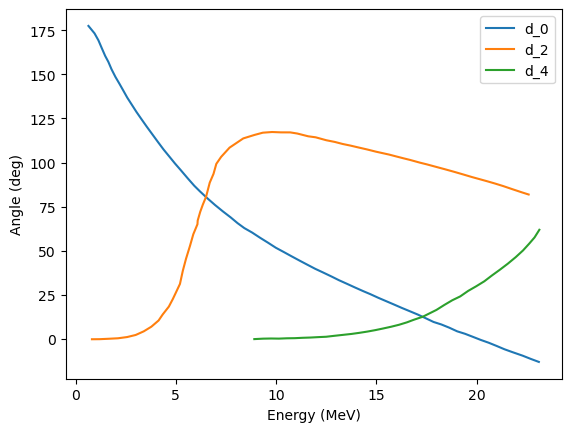

In [5]:
plt.Figure
plt.plot(d0_en, d0_ang, label="d_0")
plt.plot(d2_en, d2_ang, label="d_2")
plt.plot(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')

In [6]:
# Convert everything to a numpy array
d0_ang = np.array(d0_ang)
d0_en = np.array(d0_en)
d2_ang = np.array(d2_ang)
d2_en = np.array(d2_en)
d4_ang = np.array(d4_ang)
d4_en = np.array(d4_en)

# Get rid of negative values in d2 and d4
# Now add zeros
number_zeros = 10

pos_d2 = d2_ang > 0
if ~np.all(pos_d2):
    d2_ang = d2_ang[pos_d2]
    d2_en = d2_en[pos_d2]
    if d2_en[0] != 0:
        d2_ang = np.concatenate((np.zeros(number_zeros), d2_ang))
        d2_en = np.concatenate((np.linspace(0, d2_en[0], number_zeros), d2_en))

pos_d4 = d4_ang > 0
if ~np.all(pos_d4):
    d4_ang = d4_ang[pos_d4]
    d4_en = d4_en[pos_d4]
    if d4_en[0] != 0:
        d4_ang = np.concatenate((np.zeros(number_zeros), d4_ang))
        d4_en = np.concatenate((np.linspace(0, d4_en[0], number_zeros), d4_en))

# Now get rid of any repeating energies. All should be unique.
# Remove duplicate energy values (x) while keeping matching delta_L (y)
d0_en, indices = np.unique(d0_en, return_index=True)
d0_ang = d0_ang[indices]

d2_en, indices = np.unique(d2_en, return_index=True)
d2_ang = d2_ang[indices]

d4_en, indices = np.unique(d4_en, return_index=True)
d4_ang = d4_ang[indices]

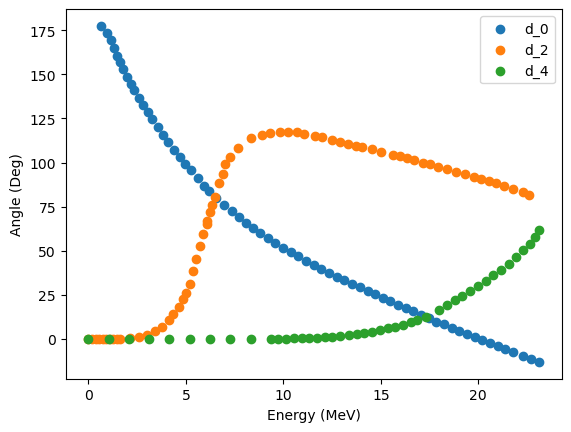

In [7]:
# Plot

plt.Figure
plt.scatter(d0_en, d0_ang, label="d_0")
plt.scatter(d2_en, d2_ang, label="d_2")
plt.scatter(d4_en, d4_ang, label="d_4")
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (Deg)")
plt.legend(loc='upper right')

In [8]:
common_energy = np.linspace(0.1, 23, 75)

interp_l0 = interp1d(d0_en, d0_ang, kind='cubic', fill_value="extrapolate")
interp_l2 = interp1d(d2_en, d2_ang, kind='cubic', fill_value="extrapolate")
interp_l4 = interp1d(d4_en, d4_ang, kind='cubic', fill_value="extrapolate")

d_l0_interp = interp_l0(common_energy)
d_l2_interp = interp_l2(common_energy)
d_l4_interp = interp_l4(common_energy)

# Create the spline fit (s=0 means interpolate exactly)
#delta_spline_0 = UnivariateSpline(d0_en, d0_ang, s=2)
#delta_spline_2 = UnivariateSpline(d2_en, d2_ang, s=2)
#delta_spline_4 = UnivariateSpline(d4_en, d4_ang, s=2)

#delta_vals_0 = delta_spline_0(common_energy)
#delta_vals_2 = delta_spline_2(common_energy)
#delta_vals_4 = delta_spline_4(common_energy)

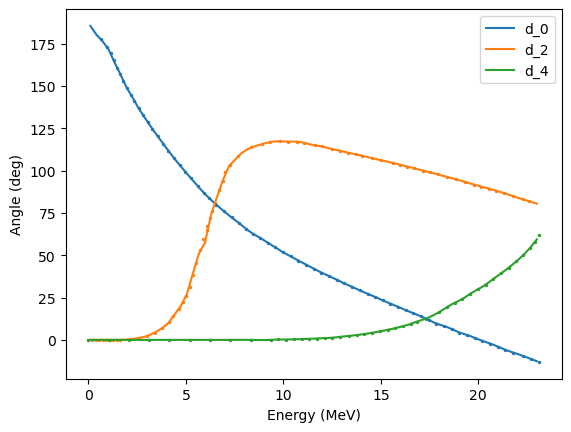

In [9]:
plt.Figure()
#plt.plot(common_energy, delta_vals_0, label="d_0")
#plt.plot(common_energy, delta_vals_2, label="d_2")
#plt.plot(common_energy, delta_vals_4, label="d_4")
plt.plot(common_energy, d_l0_interp, label="d_0")
plt.plot(common_energy, d_l2_interp, label="d_2")
plt.plot(common_energy, d_l4_interp, label="d_4")
plt.scatter(d0_en, d0_ang, s=2)
plt.scatter(d2_en, d2_ang, s=2)
plt.scatter(d4_en, d4_ang, s=2)
plt.xlabel("Energy (MeV)")
plt.ylabel("Angle (deg)")
plt.legend(loc='upper right')
#plt.xlim(0, 5)
#plt.ylim(-1, 5)

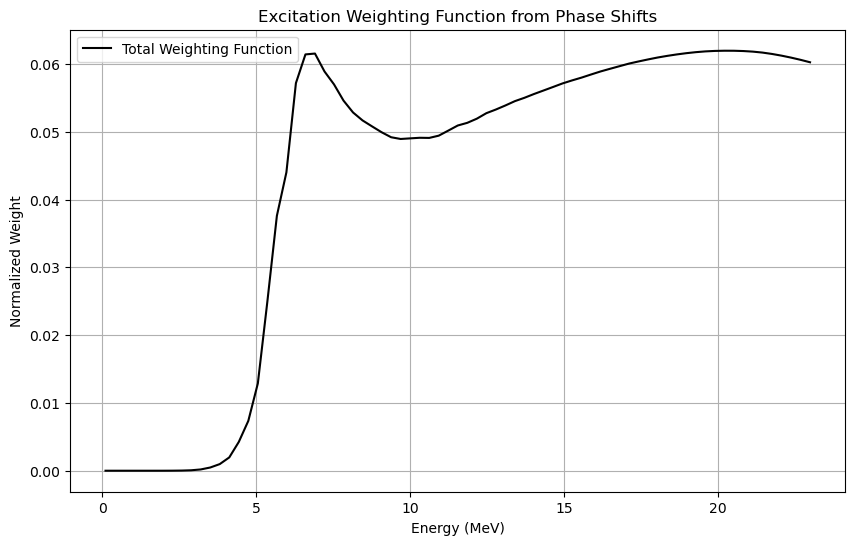

In [14]:
W0 = (2*0 + 1) * np.sin(np.radians(d_l0_interp))**2
W2 = (2*2 + 1) * np.sin(np.radians(d_l2_interp))**2
W4 = (2*4 + 1) * np.sin(np.radians(d_l4_interp))**2

W_total = W2 #W0 + W2 + W4

W_total /= np.trapz(W_total, common_energy)  # Normalize area under curve to 1


plt.figure(figsize=(10,6))
plt.plot(common_energy, W_total, label='Total Weighting Function', color='black')
#plt.plot(common_energy, W0, label=r'$L=0$', linestyle='--')
#plt.plot(common_energy, W2, label=r'$L=2$', linestyle='-.')
#plt.plot(common_energy, W4, label=r'$L=4$', linestyle=':')
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized Weight')
plt.title('Excitation Weighting Function from Phase Shifts')
plt.legend()
plt.grid(True)
#plt.yscale('log')
plt.show()

<>:96: SyntaxWarning: invalid escape sequence '\d'
<>:96: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_94098/3580305985.py:96: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')


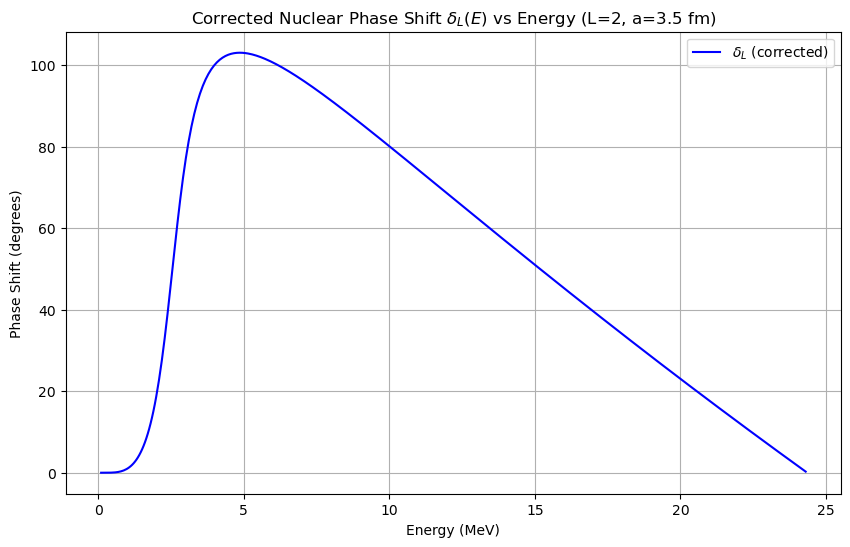

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z_alpha = 2
Z_C12 = 4

m_alpha = 3727.379378  # MeV/c^2
# m_C12 = 11177.929      # MeV/c^2 

mu_alpha_alpha = m_alpha / 2
# mu_alpha_C12 = (m_alpha * m_C12) / (m_alpha + m_C12)

a_alpha_alpha = 3.5  # fm (channel radius)
a_alpha_C12 = 5.5 # fm
L_d = 2  # d-wave
L_f = 3 # f-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
delta_Ld = []
phi_Ld = []
P_Ld_list = []
P_Lf_list = []
numerator_Ld_list = []
denominator_Ld_list = []

# Loop over energies
for E in energies:
    k_alpha_alpha = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_alpha = Z_alpha * Z_alpha * e_squared * mu_alpha_alpha / (hbar_c**2 * k_alpha_alpha)
    kr_alpha_alpha = k_alpha_alpha * a_alpha_alpha

    #k_alpha_C12 = np.sqrt(2 * mu_alpha_C12 * E) / hbar_c
    #eta_alpha_C12 = Z_alpha * Z_C12 * e_squared * mu_alpha_C12 / (hbar_c**2 * k_alpha_C12)
    #kr_alpha_C12 = k_alpha_C12 * a_alpha_C12

    # Coulomb wavefunctions
    F_Ld = float(mpmath.coulombf(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))
    G_Ld = float(mpmath.coulombg(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))

    #F_Lf = float(mpmath.coulombf(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))
    #G_Lf = float(mpmath.coulombg(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(F_Ld, G_Ld)
    phi_Ld.append(phi)

    # Penetrability
    P_Ld = (kr_alpha_alpha) / (F_Ld**2 + G_Ld**2)
    P_Ld_list.append(P_Ld)

    # P_Lf = (kr_alpha_C12) / (F_Lf**2 + G_Lf**2)
    # P_Lf_list.append(P_Lf)

    # Width and shift correction
    Gamma_E = 2 * P_Ld * gamma2
    

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    numerator_Ld_list.append(numerator)
    denominator = E_r - E
    denominator_Ld_list.append(denominator)
    delta = -phi + np.arctan2(numerator, denominator)
    delta_Ld.append(delta)

# Convert to arrays
delta_Ld = np.array(delta_Ld)
phi_Ld = np.array(phi_Ld)
P_Ld_array = np.array(P_Ld_list)
P_Lf_array = np.array(P_Lf_list)
numerator_Ld_array = np.array(numerator_Ld_list)
denominator_Ld_array = np.array(denominator_Ld_list)

# Convert phase shift to degrees
delta_L_deg = np.degrees(delta_Ld)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, label=r'$\delta_L$ (corrected)', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


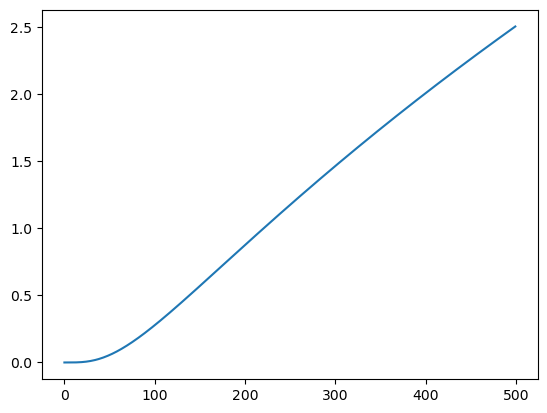

In [298]:
plt.plot(phi_Ld)

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/3210597090.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (arb. units)')
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/3210597090.py:8: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Excitation Curve from $\delta_L(E)$ (L=2, a=3.5 fm)')


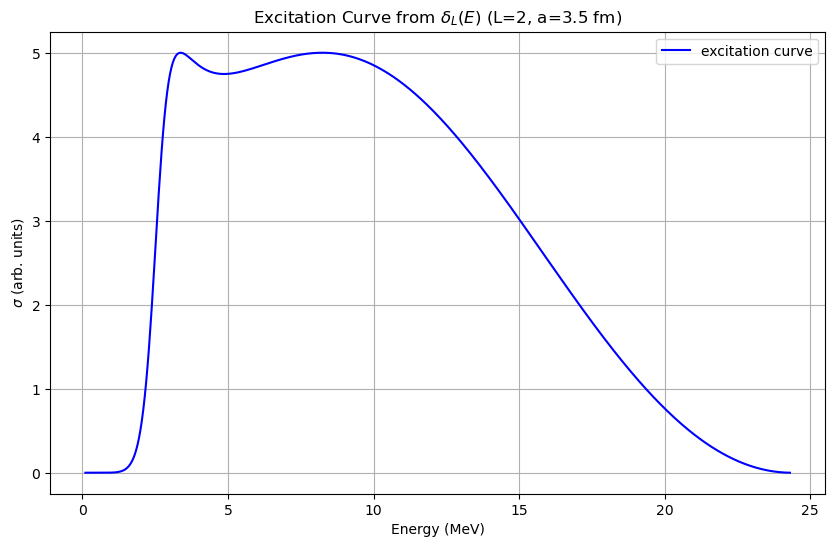

In [33]:
excitation_curve = (2 * L_d + 1) * np.sin(delta_Ld)**2

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, excitation_curve, label='excitation curve', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('$\sigma$ (arb. units)')
plt.title('Excitation Curve from $\delta_L(E)$ (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/145823279.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (arb. units)')


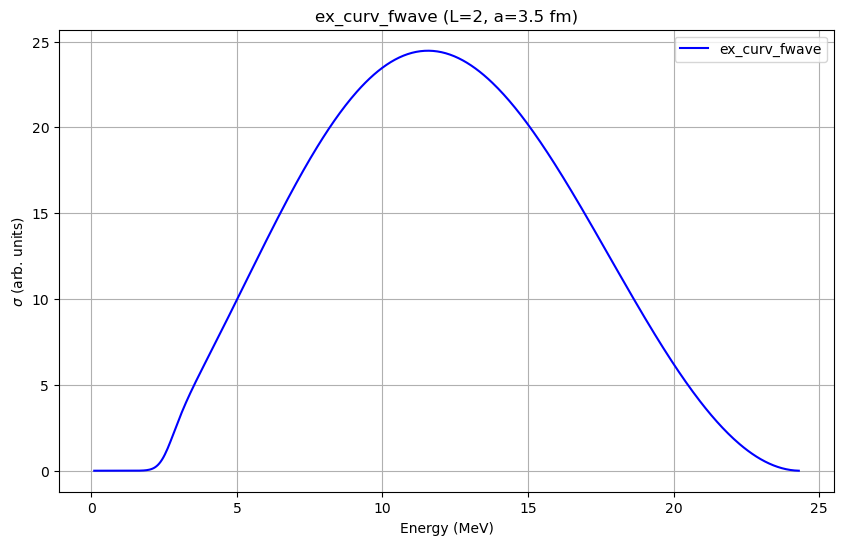

In [34]:
ex_curv_fwave = excitation_curve*P_Lf_array

# Convolute with 
plt.figure(figsize=(10, 6))
plt.plot(energies, ex_curv_fwave, label='ex_curv_fwave', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('$\sigma$ (arb. units)')
plt.title('ex_curv_fwave (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()

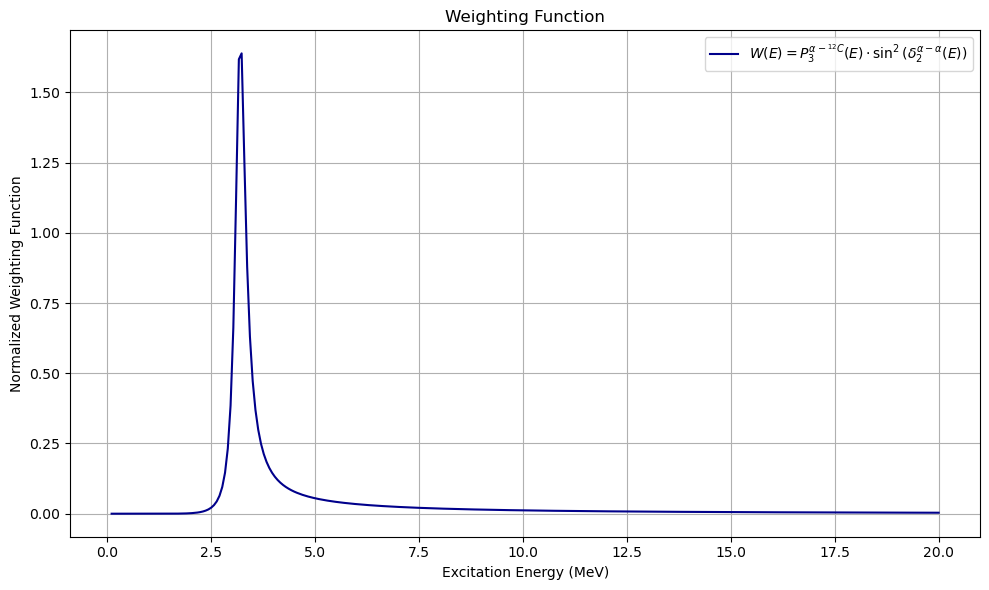

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import UnivariateSpline

# Set mpmath precision
mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm

# Particle properties for α–α phase shift (delta_2)
Z1_alpha = 2
Z2_alpha = 2
mu_alpha = (4 * 4) / (4 + 4) * 931.5  # Reduced mass in MeV/c^2 for alpha-alpha

# Particle properties for f-wave penetrability (α–12C)
Z1_c12 = 2
Z2_c12 = 6
mu_c12 = (4 * 12) / (4 + 12) * 931.5  # Reduced mass in MeV/c^2 for alpha-12C

# Channel radius
a = 5.5  # fm

# Energy range
energies = np.linspace(0.1, 20.0, 300)

# Simulated δ2(E) (replace with real phase shift data if available)
E_res = 3.18  # MeV (resonance energy)
Gamma = 0.3  # MeV (width)
delta_2 = np.arctan2(Gamma / 2, E_res - energies)

# Interpolated and smoothed sin^2(delta_2)
sin2_delta_2 = np.sin(delta_2)**2

# Calculate f-wave (l=3) penetrability for α–12C
penetrability_f_wave = []
for E in energies:
    k = np.sqrt(2 * mu_c12 * E) / hbar_c
    eta = Z1_c12 * Z2_c12 * e_squared * mu_c12 / (hbar_c**2 * k)
    ka = k * a
    F_L = float(coulombf(3, eta, ka, derivative=False))
    G_L = float(coulombg(3, eta, ka, derivative=False))
    P_L = (k * a) / (F_L**2 + G_L**2)
    penetrability_f_wave.append(P_L)
penetrability_f_wave = np.array(penetrability_f_wave)

# Compute and normalize the weighting function
W_E = sin2_delta_2 * penetrability_f_wave
W_E /= np.trapz(W_E, energies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energies, W_E, label=r'$W(E) = P_3^{\alpha-^{12}C}(E) \cdot \sin^2(\delta_2^{\alpha-\alpha}(E))$', color='darkblue')
plt.xlabel('Excitation Energy (MeV)')
plt.ylabel('Normalized Weighting Function')
plt.title('Weighting Function')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import coulombf, coulombg, mp
from scipy.interpolate import interp1d


# Set mpmath precision
mp.dps = 15

def compute_weighting_function_Be8(num_points=300):
    """
    Compute the weighting function W(E) = P_3(E) * sin^2(delta_2(E)) for 8Be energy distribution.

    Args:
        E_res (float): Resonance energy in MeV.
        Gamma (float): Width of the resonance in MeV.
        a (float): Channel radius in fm.
        num_points (int): Number of energy grid points.

    Returns:
        energies (np.ndarray): Energy values in MeV.
        W_E (np.ndarray): Normalized weighting function.
    """
    # Constants
    hbar_c = 197.327  # MeV·fm
    e_squared = 1.4399764  # MeV·fm
    E_res = 3.18
    Gamma = 1.5 # 0.3
    a = 5.5


    # Reduced masses
    #mu_alpha = (4 * 4) / (4 + 4) * 931.5  # MeV/c^2 for alpha-alpha
    mu_c12 = (4 * 12) / (4 + 12) * 931.5  # MeV/c^2 for alpha-12C

    # Charges
    #Z1_alpha, Z2_alpha = 2, 2
    Z1_c12, Z2_c12 = 2, 6

    # Energy range
    energies = np.linspace(0.1, 20.0, num_points)

    # Simulated δ2(E)
    delta_2 = np.arctan2(Gamma / 2, E_res - energies)
    sin2_delta_2 = np.sin(delta_2)**2

    # Calculate penetrability for l=3
    penetrability_f_wave = []
    for E in energies:
        k = np.sqrt(2 * mu_c12 * E) / hbar_c
        eta = Z1_c12 * Z2_c12 * e_squared * mu_c12 / (hbar_c**2 * k)
        ka = k * a
        F_L = float(coulombf(3, eta, ka, derivative=False))
        G_L = float(coulombg(3, eta, ka, derivative=False))
        P_L = (k * a) / (F_L**2 + G_L**2)
        penetrability_f_wave.append(P_L)

    penetrability_f_wave = np.array(penetrability_f_wave)

    # Compute and normalize the weighting function
    W_E = sin2_delta_2 * penetrability_f_wave
    W_E /= np.trapz(W_E, energies)

    return energies, W_E

def sample_weighted_energy(energies, weights, n_samples):
    """
    Directly sample n_samples energy values from a normalized weighting function.

    Args:
        energies (np.ndarray): Array of energy values (x-axis).
        weights (np.ndarray): Normalized weights (probability distribution, should integrate to 1).
        n_samples (int): Number of samples to draw.

    Returns:
        np.ndarray: Array of sampled energy values.
    """
    # Ensure weights are normalized
    weights = weights / np.trapz(weights, energies)

    # Compute cumulative distribution function (CDF)
    cdf = np.cumsum(weights)
    cdf /= cdf[-1]  # Normalize to 1

    # Create inverse CDF interpolator
    inverse_cdf = interp1d(cdf, energies, kind='linear', bounds_error=False, fill_value=(energies[0], energies[-1]))

    # Sample uniformly from [0,1], map through inverse CDF
    uniform_samples = np.random.rand(n_samples)
    sampled_energies = inverse_cdf(uniform_samples)

    return sampled_energies

In [116]:
t=[2,3,4,5]

t[-1]

5

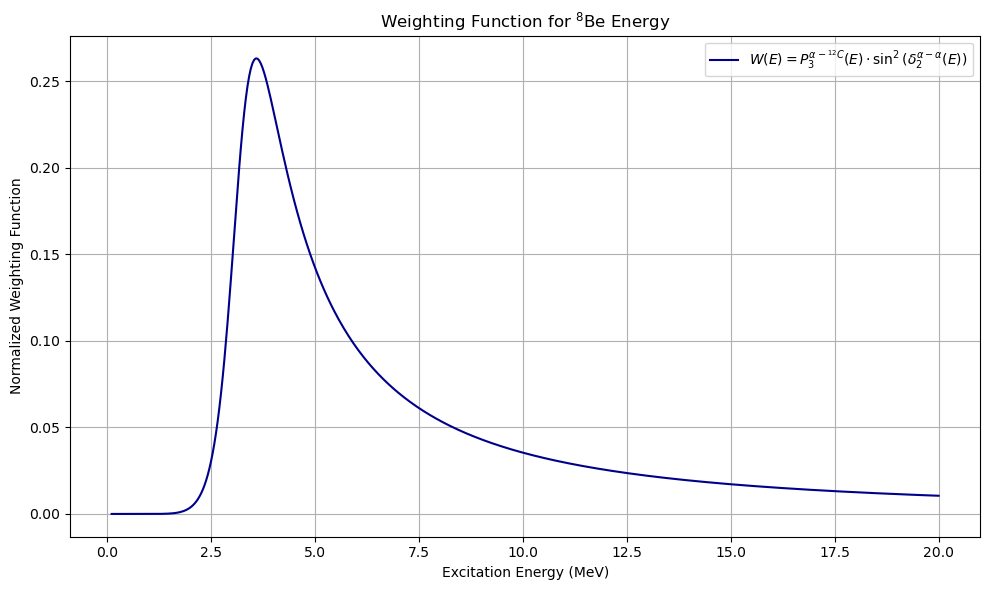

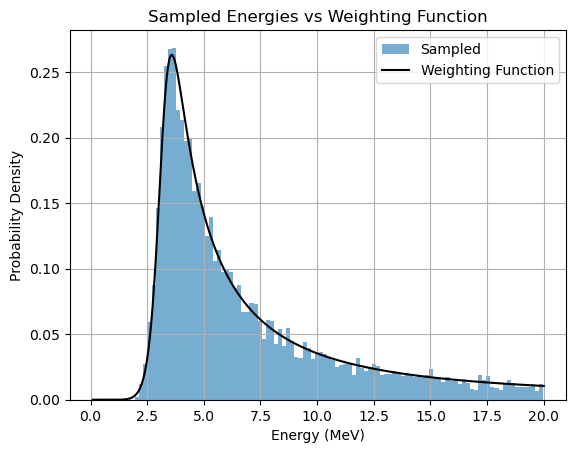

In [112]:
# Compute and plot
energies, W_E = compute_weighting_function_Be8(500)

plt.figure(figsize=(10, 6))
plt.plot(energies, W_E, label=r'$W(E) = P_3^{\alpha-^{12}C}(E) \cdot \sin^2(\delta_2^{\alpha-\alpha}(E))$', color='darkblue')
plt.xlabel('Excitation Energy (MeV)')
plt.ylabel('Normalized Weighting Function')
plt.title('Weighting Function for $^8$Be Energy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

samples = sample_weighted_energy(energies, W_E, 10000)

import matplotlib.pyplot as plt
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Sampled')
plt.plot(energies, W_E, 'k-', label='Weighting Function')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability Density')
plt.title('Sampled Energies vs Weighting Function')
plt.legend()
plt.grid(True)
plt.show()


<>:89: SyntaxWarning: invalid escape sequence '\d'
<>:89: SyntaxWarning: invalid escape sequence '\d'
/var/folders/sb/gtrmzjv52898jwr5g3trrhpc0000gp/T/ipykernel_2745/1186320120.py:89: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')


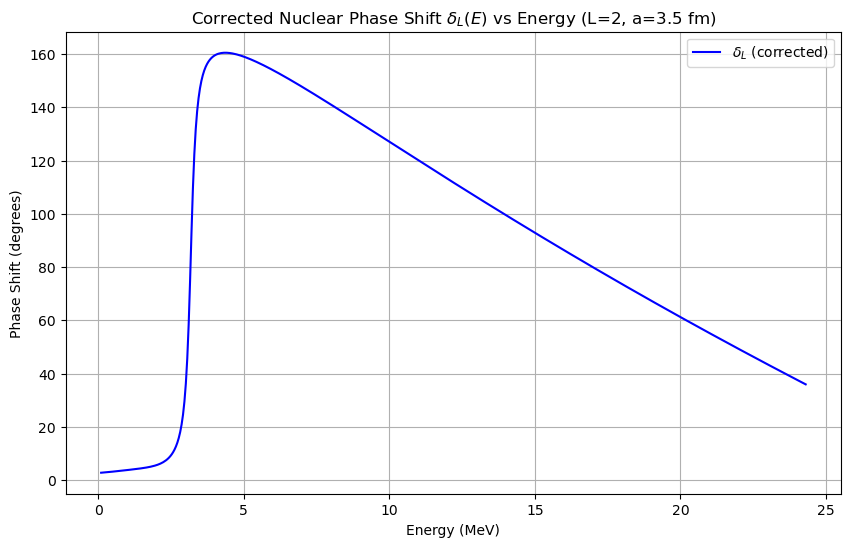

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import mpmath

# Set mpmath precision
mpmath.mp.dps = 15

# Constants
hbar_c = 197.327  # MeV·fm
e_squared = 1.4399764  # MeV·fm
Z_alpha = 2
Z_C12 = 4

m_alpha = 3727.379378  # MeV/c^2
m_C12 = 11177.929      # MeV/c^2 

mu_alpha_alpha = m_alpha / 2
mu_alpha_C12 = (m_alpha * m_C12) / (m_alpha + m_C12)

a_alpha_alpha = 3.5  # fm (channel radius)
a_alpha_C12 = 5.5 # fm
L_d = 2  # d-wave
L_f = 3 # f-wave

# Resonance parameters
E_r = 3.18  # MeV (resonance energy)
gamma2 = 3.36  # MeV (reduced width)

# Energy range
energies = np.linspace(0.1, 24.3, 500)

# Arrays to store
delta_Ld = []
phi_Ld = []
P_Ld_list = []
P_Lf_list = []

# Loop over energies
for E in energies:
    k_alpha_alpha = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_alpha = Z_alpha * Z_alpha * e_squared * mu_alpha_alpha / (hbar_c**2 * k_alpha_alpha)
    kr_alpha_alpha = k_alpha_alpha * a_alpha_alpha

    k_alpha_C12 = np.sqrt(2 * mu_alpha_alpha * E) / hbar_c
    eta_alpha_C12 = Z_alpha * Z_C12 * e_squared * mu_alpha_C12 / (hbar_c**2 * k_alpha_C12)
    kr_alpha_C12 = k_alpha_C12 * a_alpha_C12

    # Coulomb wavefunctions
    F_Ld = float(mpmath.coulombf(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))
    G_Ld = float(mpmath.coulombg(L_d, eta_alpha_alpha, kr_alpha_alpha, derivative=False))

    F_Lf = float(mpmath.coulombf(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))
    G_Lf = float(mpmath.coulombg(L_f, eta_alpha_C12, kr_alpha_C12, derivative=False))

    # Hard-sphere Coulomb phase shift Phi_L
    phi = np.arctan2(F_Ld, G_Ld)
    phi_Ld.append(phi)

    # Penetrability
    P_Ld = (kr_alpha_alpha) / (F_Ld**2 + G_Ld**2)
    P_Ld_list.append(P_Ld)

    P_Lf = (kr_alpha_C12) / (F_Lf**2 + G_Lf**2)
    P_Lf_list.append(P_Lf)

    # Width and shift correction
    Gamma_E = 0.3 #2 * P_Ld * gamma2

    # Correct phase shift calculation with arctan2
    numerator = 0.5 * Gamma_E
    denominator = E_r - E
    delta = -phi + np.arctan2(numerator, denominator)
    delta_Ld.append(delta)

# Convert to arrays
delta_Ld = np.array(delta_Ld)
phi_Ld = np.array(phi_Ld)
P_Ld_array = np.array(P_Ld_list)
P_Lf_array = np.array(P_Lf_list)

# Convert phase shift to degrees
delta_L_deg = np.degrees(delta_Ld)

# Plot the corrected phase shift
plt.figure(figsize=(10, 6))
plt.plot(energies, delta_L_deg, label=r'$\delta_L$ (corrected)', color='blue')
plt.xlabel('Energy (MeV)')
plt.ylabel('Phase Shift (degrees)')
plt.title('Corrected Nuclear Phase Shift $\delta_L(E)$ vs Energy (L=2, a=3.5 fm)')
plt.grid(True)
plt.legend()
plt.show()


# Recreate weighting function from Stave's data.

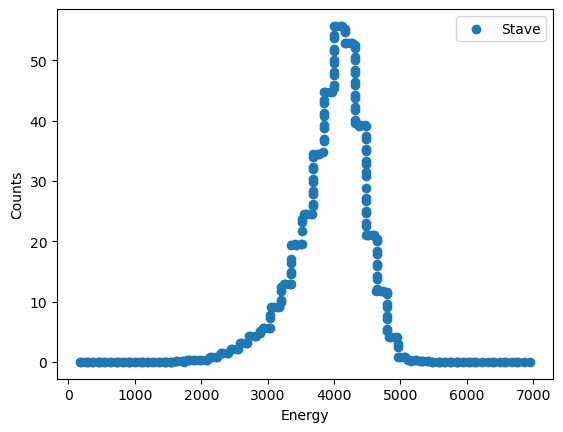

In [128]:
# Now let's look at Stave's alpha spectrum.

alpha1_histData = []

# opening the CSV file  
with open('StavePrimaryAlphas.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha1_histData.append([float(lines[0]),float(lines[1])])

alpha1_histData = np.array(alpha1_histData)

en_alpha1_stave = alpha1_histData[:,0]
cnts_alpha1_stave = alpha1_histData[:,1]

# sort & sanitize
order = np.argsort(en_alpha1_stave)
en_alpha1_stave, cnts_alpha1_stave = en_alpha1_stave[order], cnts_alpha1_stave[order]
mask = np.isfinite(en_alpha1_stave) & np.isfinite(cnts_alpha1_stave)
en_alpha1_stave, cnts_alpha1_stave = en_alpha1_stave[mask], np.clip(cnts_alpha1_stave[mask], 0.0, None)

plt.scatter(en_alpha1_stave,cnts_alpha1_stave,label="Stave")
plt.xlabel("Energy")
plt.ylabel("Counts")
plt.legend()

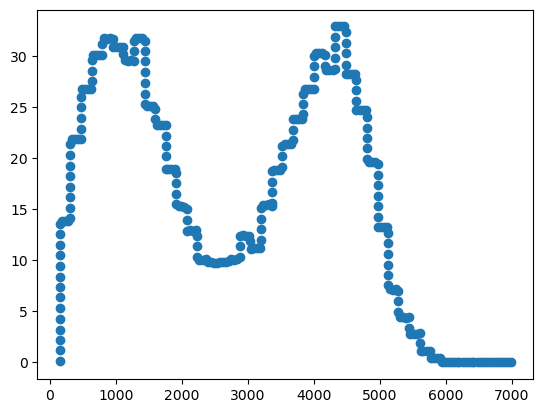

In [32]:
alpha2_histData = []

#alpha2_en = []
#alpha2_counts = []

# opening the CSV file  
with open('StaveSecondaryAlphas.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha2_histData.append([float(lines[0]),float(lines[1])])

alpha2_histData = np.array(alpha2_histData,float)

en_alpha2_stave = alpha2_histData[:,0]
cnts_alpha2_stave = alpha2_histData[:,1]

# sort & sanitize data
order = np.argsort(en_alpha2_stave)
en_alpha2_stave, cnts_alpha2_stave = en_alpha2_stave[order], cnts_alpha2_stave[order]
mask = np.isfinite(en_alpha2_stave) & np.isfinite(cnts_alpha2_stave)
en_alpha2_stave, cnts_alpha2_stave = en_alpha2_stave[mask], np.clip(cnts_alpha2_stave[mask], 0.0, None)

plt.scatter(en_alpha2_stave,cnts_alpha2_stave)

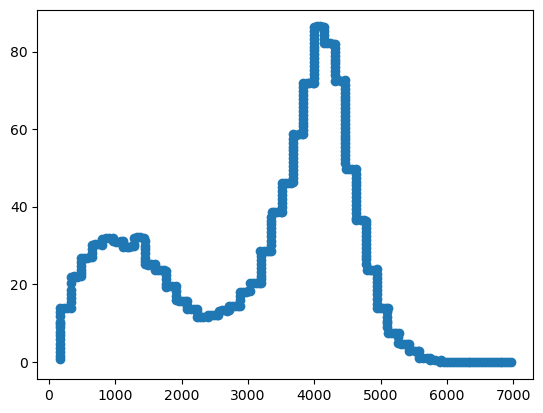

In [21]:
simulation_histData = []

# opening the CSV file  
with open('StaveSimulation.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        simulation_histData.append([float(lines[0]),float(lines[1])])

simulation_histData = np.array(simulation_histData)

en_stave_simulation = simulation_histData[:,0]
cnts_stave_simulation = simulation_histData[:,1]

# sort & sanitize data
order = np.argsort(en_stave_simulation)
en_stave_simulation, cnts_stave_simulation = en_stave_simulation[order], cnts_stave_simulation[order]
mask = np.isfinite(en_stave_simulation) & np.isfinite(cnts_stave_simulation)
en_stave_simulation, cnts_stave_simulation = en_stave_simulation[mask], np.clip(cnts_stave_simulation[mask], 0.0, None)

plt.scatter(simulation_histData[:,0],simulation_histData[:,1])



In [160]:
t = np.array([1,2,3,4,5])

t[1:]

array([2, 3, 4, 5])

In [194]:
def sample_alpha_spectrum(energies, weights, n_samples, *, smooth_sigma=0.0, rng=None):

    """
    Directly sample n_samples energy values from a normalized weighting function.

    Args:
        energies (np.ndarray): Array of energy values (x-axis).
        weights (np.ndarray): Normalized weights (probability distribution, should integrate to 1).
        n_samples (int): Number of samples to draw.
        smooth_sigma : float, optional (default 0.0)
            Gaussian smoothing width in *points* along the digitized curve.
            Use 0.5 - 1.0 to gently suppress pixel/zig-zag noise from digitization.
            0.0 disables smoothing.
        rng : np.random.Generator or None
            Optional RNG for reproducibility (np.random.default_rng(seed)).

    Returns:
        np.ndarray: Array of sampled energy values.
    """

    # Gaussian smoothing in index space
    if smooth_sigma > 0:
        # kernel half-width (points)
        # set of weights
        k = int(max(2, 3*smooth_sigma)) #Keep above 2.
        xk = np.arange(-k, k+1)
        # Use a form that makes smooth_sigma the standard deviation
        g = np.exp(-0.5*(xk/smooth_sigma)**2)
        g /= g.sum()
        # reflect-pad to avoid edge losses; convolve only Y (not E)
        Y_padded = np.pad(weights, (k, k), mode='reflect')
        Y = np.convolve(Y_padded, g, mode='valid')

    # build normalized CDF via trapezoid rule on irregular grid
    F = np.empty_like(energies)
    F[0] = 0.0
    F[1:] = np.cumsum(0.5 * (Y[:-1] + Y[1:]) * np.diff(energies))
    total = F[-1]
    F /= total  # normalize to [0,1]

    # inverse-CDF sampling
    rng = np.random.default_rng() if rng is None else rng
    u = rng.random(int(n_samples))
    return np.interp(u, F, energies)

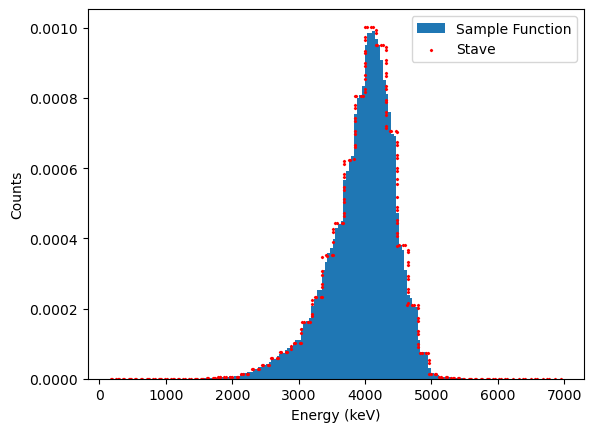

In [156]:
# Normalize using trapezoidal rule
area = np.trapz(cnts_alpha1_stave, en_alpha1_stave)
y_norm = cnts_alpha1_stave / area

se_1 = sample_alpha_spectrum(en_alpha1_stave, cnts_alpha1_stave, 601977,smooth_sigma=1) #11977
plt.hist(se_1,bins=100, density=True,label="Sample Function")
plt.scatter(en_alpha1_stave,y_norm,label="Stave",marker="x",s=2,c="r")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [157]:
def Q_calc(m1, m3, m4, theta_L_deg, en1, en3):
    """
        Calculate the Q of the reaction.

        Args:
            m1 (float): mass of the initial particle
            m3 (float): mass of the product particle 
            m4 (float): mass of the product particle
            theta_L_deg (float or array-like): scattering angle in degrees
            en1 (float): energy of the initial particle
            en3 (float): energy of product particle

        Returns:
            Q: array of the Q value for each scattering angle in theta_L
        """
    # Convert to numpy arrays
    m1 = np.asarray( m1, dtype=float)
    m3 = np.asarray( m3, dtype=float)
    m4 = np.asarray( m4, dtype=float)
    en1 = np.asarray( en1, dtype=float)
    en3 = np.asarray( en3, dtype=float)

    # Convert theta_L to radians for later use in calculations.
    theta_L = np.radians(theta_L_deg)

    Q = en3*(1+m3/m4) - en1*(1-m1/m4) - 2*np.sqrt(m1*en1*m3*en3)/m4*np.cos(theta_L)

    # Return the Q values.
    return Q

def en3_calc(m1, m3, m4, theta_L_deg, Q, en1):
    """
        Calculate the energy of a particle produced.

        Args:
            m1 (float): mass of the initial particle
            m3 (float): mass of the product particle that is being solved
            m4 (float): mass of the product particle
            theta_L_deg (float or array-like): scattering angle in degrees
            Q (float): Q-value of reaction
            en1 (float): energy of the initial particle

        Returns:
            np.array: array of the final particle energies for each scattering angle in theta_L
        """
    # Convert to numpy arrays
    m1 = np.asarray( m1, dtype=float)
    m3 = np.asarray( m3, dtype=float)
    m4 = np.asarray( m4, dtype=float)
    Q = np.asarray( Q, dtype=float)
    en1 = np.asarray( en1, dtype=float)

    # Convert theta_L to radians for later use in calculations.
    theta_L = np.radians(theta_L_deg)

    # Calculate intermediate quantities v and w.
    v = np.sqrt(m1*m3*en1)/(m3+m4)*np.cos(theta_L)
    w = (m4*Q+en1*(m4-m1))/(m3+m4)
    
    # Calculate and remove negative values in the energy calculation.
    en_test = v**2+w
    # Get rid of negative due to roundoff
    en_test = np.where(en_test >= 0.0, en_test,np.nan)

    # Calculate the final energies of the particle by adding/subtracting the square root of the positive/negative energy part.
    e3p_sqrt = v + np.sqrt(en_test)
    e3n_sqrt = v - np.sqrt(en_test)

    # Check if energies are negative by setting negative values to NaN.
    e3p_sqrt = np.where(e3p_sqrt >= 0.0,e3p_sqrt, np.nan)
    e3n_sqrt = np.where(e3n_sqrt >= 0.0,e3n_sqrt, np.nan)

    # Use e3p_sqrt if not a nan.
    # Otherwise use e3n_sqrt
    e3_sqrt = np.where(~np.isnan(e3p_sqrt),e3p_sqrt,e3n_sqrt)

    # Return the final particle energy values.
    return e3_sqrt**2

## Use edges of alpha_0 peak to approximate angles accepted by detector.

In [158]:
##Constants

u_to_MeV = 931.494 # 1 u in MeV/c^2
mp=1.00727646 * u_to_MeV # mass of proton
mB11=11.0093052 * u_to_MeV # mass of B11
mAlpha=4.002602 * u_to_MeV # mass of alpha
mBe8=8.00530510 * u_to_MeV # mass of Be8

QBe8=8.586 # Q value of Be8

enp_lab = 0.675 # MeV energy of proton

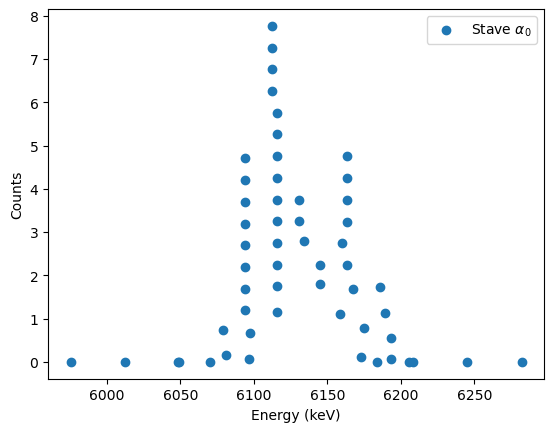

In [114]:
#6.2229 - 6.0573
# simga angle^2 + sigma detector^2
# FWHM^2 - detect resolution^2
#np.sqrt(170**2-17**2)

# Now let's look at Stave's alpha spectrum.

alpha0_histData = []

# opening the CSV file  
with open('Stave_alpha_0.csv', mode ='r')as file:  
      
  # reading the CSV file  
  csvFile = csv.reader(file)  
    
  # displaying the contents of the CSV file  
  for lines in csvFile:  
        alpha0_histData.append([float(lines[0]),float(lines[1])])

alpha0_histData = np.array(alpha0_histData)

en_alpha0_stave = alpha0_histData[:,0]
cnts_alpha0_stave = alpha0_histData[:,1]

# sort & sanitize
order = np.argsort(en_alpha0_stave)
en_alpha0_stave, cnts_alpha0_stave = en_alpha0_stave[order], cnts_alpha0_stave[order]
mask = np.isfinite(en_alpha0_stave) & np.isfinite(cnts_alpha0_stave)
en_alpha0_stave, cnts_alpha0_stave = en_alpha0_stave[mask], np.clip(cnts_alpha0_stave[mask], 0.0, None)

plt.scatter(en_alpha0_stave,cnts_alpha0_stave,label="Stave $\\alpha_0$")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()

In [100]:
def find_peak_edges(energies, counts, frac=0.1):
    """
    Find left and right edges of a peak using a fractional threshold.

    Parameters
    ----------
    energies : array
        Bin centers.
    counts : array
        Histogram counts.
    frac : float
        Fraction of peak height (0.1 = 10%) above background to define edges.

    Returns
    -------
    E_left, E_right : float
        Energy at left and right edges (MeV).
    """

    # Estimate background as the minimum counts in the spectrum
    background = counts.min()

    # Peak maximum above background
    peak_height = counts.max() - background
    threshold = background + frac * peak_height

    # Find indices where counts cross threshold
    above = counts >= threshold
    idx = np.where(above)[0]

    if len(idx) == 0:
        raise ValueError("No peak found above threshold.")

    left_idx, right_idx = idx[0], idx[-1]

    # Interpolate for more accurate edge positions
    def interp_edge(i1, i2):
        c1, c2 = counts[i1], counts[i2]
        E1, E2 = energies[i1], energies[i2]
        return E1 + (threshold - c1) * (E2 - E1) / (c2 - c1)

    E_left = interp_edge(left_idx-1, left_idx) if left_idx > 0 else energies[left_idx]
    E_right = interp_edge(right_idx, right_idx+1) if right_idx < len(counts)-1 else energies[right_idx]

    return E_left, E_right

In [101]:
rightEdge_alpha_0,leftEdge_alpha_0 = find_peak_edges(en_alpha0_stave, cnts_alpha0_stave, frac=0.1)

# Convert from keV to MeV
rightEdge_alpha_0 = rightEdge_alpha_0/1000
leftEdge_alpha_0 = leftEdge_alpha_0/1000

print(rightEdge_alpha_0)
print(leftEdge_alpha_0)

6.086361743021449
6.191652024903375


In [102]:
# Edges of alpha_0 peak

#rightEdge_alpha_0 = 6.2229 # MeV
#leftEdge_alpha_0 = 6.0573 # MeV

def solve_angle_from_peak(E_peak):
    f = lambda theta_deg:float(np.asarray(en3_calc(mp, mAlpha, mBe8, theta_deg, QBe8, enp_lab) - E_peak))
    theta_est = brentq(f, 1.0, 179.0)  # search in 1–179 degrees
    return theta_est


lowerAngleDeg = solve_angle_from_peak(rightEdge_alpha_0)
higherAngleDeg = solve_angle_from_peak(leftEdge_alpha_0)

print(lowerAngleDeg)
print(higherAngleDeg)

92.62475541629296
83.76550158670901


In [206]:
# Now sample over uniform cos(theta)

def sample_thetaL_cos_uniform(n, th_min_deg, th_max_deg, rng=None):
    """
    Sample theta in lab frame between two angles in degrees. The function samples over uniform cos(theta)

    Parameters
    ----------
    n : array
        Number of samples.
    th_min_deg : float
        Minimum angle in lab frame.
    th_max_deg : float
        Maximum angle in lab frame.

    Returns
    -------
    theta : array
        Sampled angles in lab frame.
    """
    rng = np.random.default_rng() if rng is None else rng
    cos_min = np.cos(np.radians(th_max_deg))
    cos_max = np.cos(np.radians(th_min_deg))
    u = rng.random(int(n))
    cos_th = cos_min + (cos_max - cos_min)*u
    return np.degrees(np.arccos(cos_th))

In [239]:
se_1 = sample_alpha_spectrum(en_alpha1_stave, cnts_alpha1_stave, 10**6, smooth_sigma=1) # keV

se_1 = se_1/1000 # MeV

theta_L_deg = sample_thetaL_cos_uniform(len(se_1), lowerAngleDeg, higherAngleDeg, rng=None)

Q_values = Q_calc(mp, mAlpha, mBe8, theta_L_deg, enp_lab, se_1)

samp_en_int_Be8  = QBe8 - Q_values

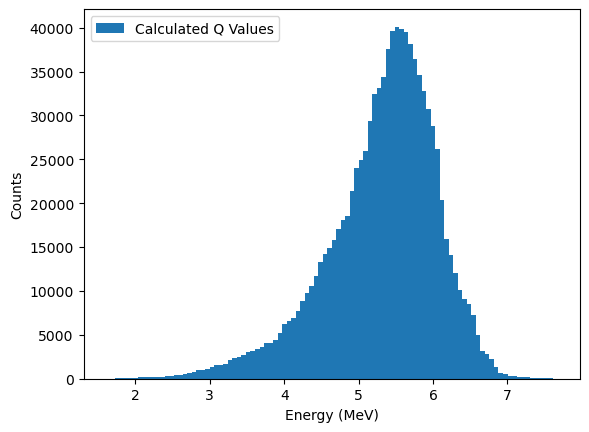

In [249]:
_ = plt.hist(Q_values,bins=100,label="Calculated Q Values")
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

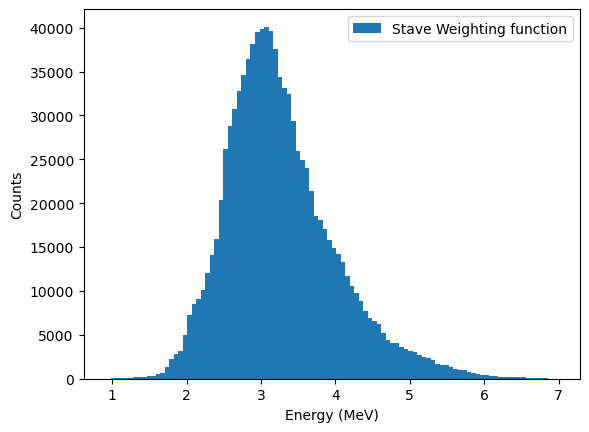

In [250]:
_ = plt.hist(samp_en_int_Be8,bins=100,label="Stave Weighting function")
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [243]:
total_reactions = len(samp_en_int_Be8)

# Effective Q-value
Q_eff = QBe8 - samp_en_int_Be8

en_alpha_01 = en3_calc(mp, mAlpha, mBe8, theta_L_deg, Q_eff, enp_lab)

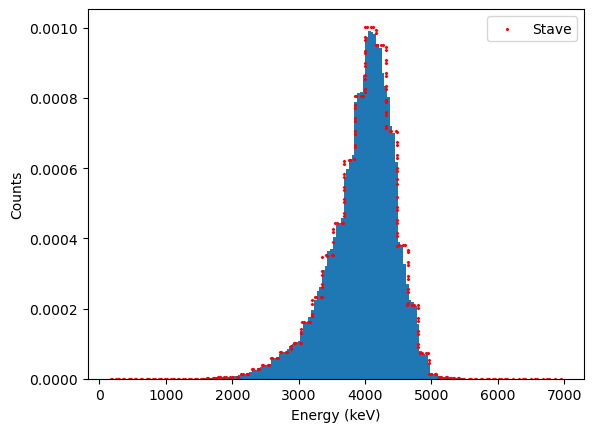

In [245]:
_ = plt.hist(en_alpha_01*1000,100,density=True)
plt.scatter(en_alpha1_stave,y_norm,label="Stave",marker="x",s=2,c="r")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.legend()
plt.show()

In [275]:
np.savetxt("Erel_samples.csv", Erel, delimiter=",", header="Erel_MeV", comments="")